# **MÉDIA MÓVEL**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 5

**Desvios da temperatura média global da terra-oceano (com referência a média de 1951-1980), medidos em graus Celsius, para os anos de 1880-2015.**
 

analisar a média móvel do desvio da temperatura média global. 

In [3]:
temperatura = pd.read_csv('temp_global.csv')

In [4]:
temperatura


,x
1,-0.20
2,-0.11
3,-0.10
4,-0.20
5,-0.28
...,...
132,0.60
133,0.63
134,0.66
135,0.75


desvio da temperatura, negativa, que foi menor, positiva que foi maior. 

# valores anuais, coletar os índices

In [5]:
indice = pd.date_range('1880 Jan 1', periods = len(temperatura), freq = 'Y')
indice

/tmp/ipykernel_5556/2840616083.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  indice = pd.date_range('1880 Jan 1', periods = len(temperatura), freq = 'Y')


DatetimeIndex(['1880-12-31', '1881-12-31', '1882-12-31', '1883-12-31',
               '1884-12-31', '1885-12-31', '1886-12-31', '1887-12-31',
               '1888-12-31', '1889-12-31',
               ...
               '2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31',
               '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31'],
              dtype='datetime64[ns]', length=136, freq='YE-DEC')

## gerar uma série

In [6]:
serie = pd.Series(temperatura['x'].values, index = indice)
serie

1880-12-31   -0.20
1881-12-31   -0.11
1882-12-31   -0.10
1883-12-31   -0.20
1884-12-31   -0.28
              ... 
2011-12-31    0.60
2012-12-31    0.63
2013-12-31    0.66
2014-12-31    0.75
2015-12-31    0.87
Freq: YE-DEC, Length: 136, dtype: float64

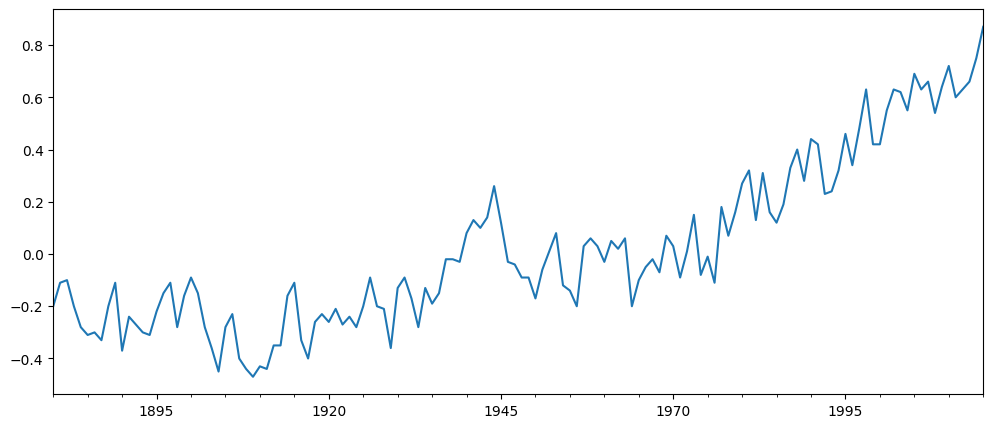

In [7]:
serie.plot();

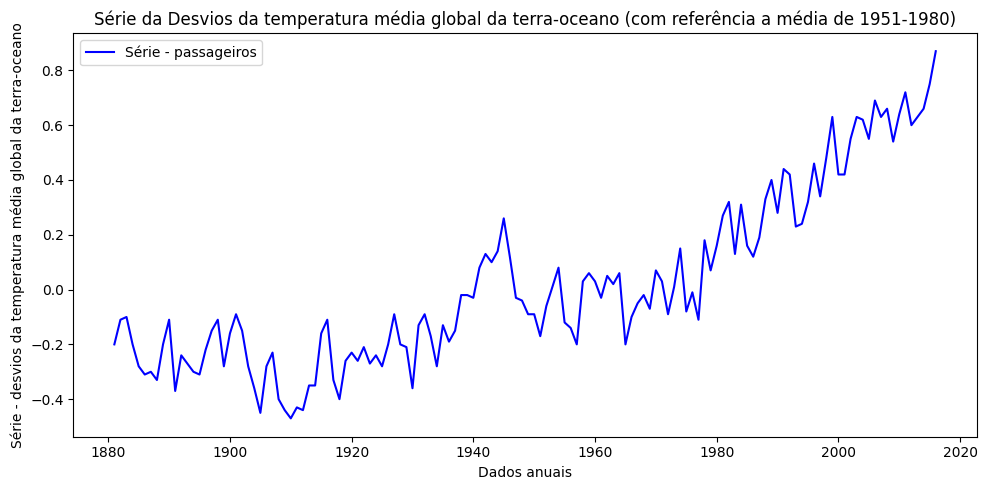

In [8]:
import matplotlib.dates as mdates


# Criando a figura e o gráfico
plt.figure(figsize=(10, 5))

# Plotando a série
#plt.plot(serie, label="Série")
plt.plot(serie.index, serie.values, label='Série - passageiros', color='blue')

# Adicionando um título ao gráfico
plt.title("Série da Desvios da temperatura média global da terra-oceano (com referência a média de 1951-1980)")

# Definindo rótulos dos eixos
plt.xlabel("Dados anuais")
plt.ylabel("Série - desvios da temperatura média global da terra-oceano")

# Rotacionando os rótulos das datas no eixo x para melhorar a visualização
plt.xticks(rotation=0)


# Formatando o eixo x para mostrar a cada 4 meses
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Colocar um marcador a cada 4 meses
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))  # Formatando para exibir ano e mês


# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()


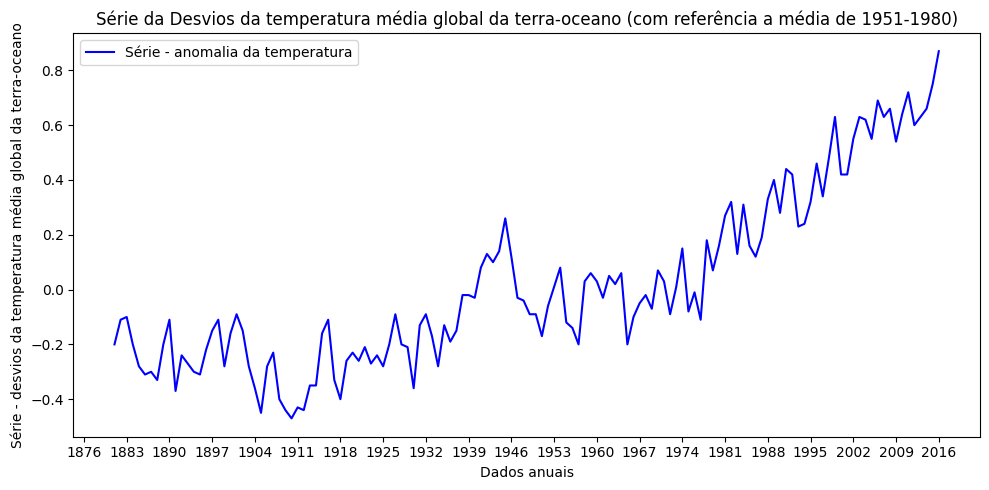

In [23]:
import matplotlib.dates as mdates


# Criando a figura e o gráfico
plt.figure(figsize=(10, 5))

# Plotando a série
#plt.plot(serie, label="Série")
plt.plot(serie.index, serie.values, label='Série - anomalia da temperatura', color='blue')

# Adicionando um título ao gráfico
plt.title("Série da Desvios da temperatura média global da terra-oceano (com referência a média de 1951-1980)")

# Definindo rótulos dos eixos
plt.xlabel("Dados anuais")
plt.ylabel("Série - desvios da temperatura média global da terra-oceano")

# Rotacionando os rótulos das datas no eixo x para melhorar a visualização
plt.xticks(rotation=0)


# Formatando o eixo x para mostrar a cada 7 dias
plt.gca().xaxis.set_major_locator(mdates.YearLocator(7))  # Colocar um marcador a cada 7 dias
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formatando para exibir ano e mês


# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()


há uma certa sazonalidade nos dados, mas não tão clara. Mas, há uma tendência de aumeto ao longo dos anos; 

Calcular a média móvel => window=3, com um período de referência de 3 casas, ou seja são 3 anos.



In [20]:
media_movel1 = serie.rolling(window=3)
media_movel1 = media_movel1.mean()
print(media_movel1)

1880-12-31         NaN
1881-12-31         NaN
1882-12-31   -0.136667
1883-12-31   -0.136667
1884-12-31   -0.193333
                ...   
2011-12-31    0.653333
2012-12-31    0.650000
2013-12-31    0.630000
2014-12-31    0.680000
2015-12-31    0.760000
Freq: YE-DEC, Length: 136, dtype: float64


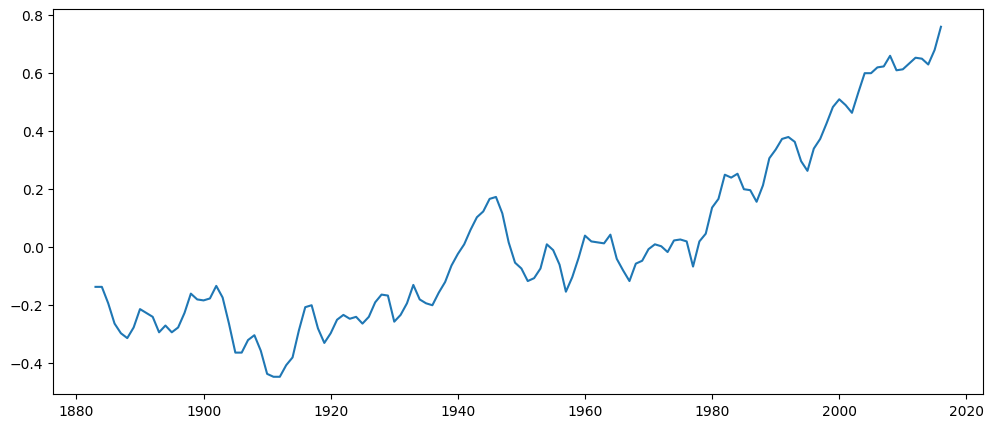

In [21]:
plt.plot(media_movel1);

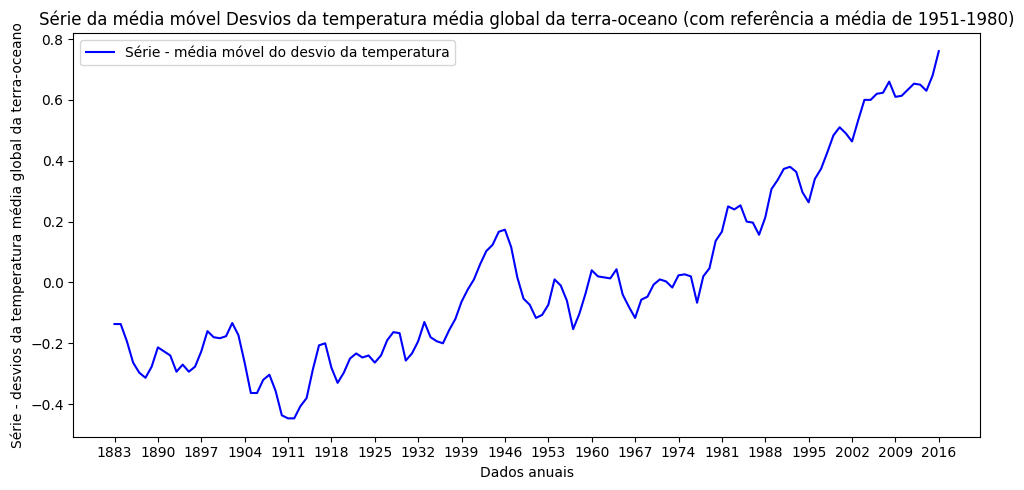

In [26]:
import matplotlib.dates as mdates


# Criando a figura e o gráfico
plt.figure(figsize=(10, 5))

# Plotando a série
#plt.plot(serie, label="Série")
plt.plot(media_movel1.index, media_movel1.values, label='Série - média móvel do desvio da temperatura', color='blue')

# Adicionando um título ao gráfico
plt.title("Série da média móvel Desvios da temperatura média global da terra-oceano (com referência a média de 1951-1980)")

# Definindo rótulos dos eixos
plt.xlabel("Dados anuais")
plt.ylabel("Série - desvios da temperatura média global da terra-oceano")

# Rotacionando os rótulos das datas no eixo x para melhorar a visualização
plt.xticks(rotation=0)


# Formatando o eixo x para mostrar a cada 7 anos
plt.gca().xaxis.set_major_locator(mdates.YearLocator(7))  # Colocar um marcador a cada 7 anos
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formatando para exibir ano e mês


# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()


# comparar se os dados estão iguais ou tem o mesmo comportamento 

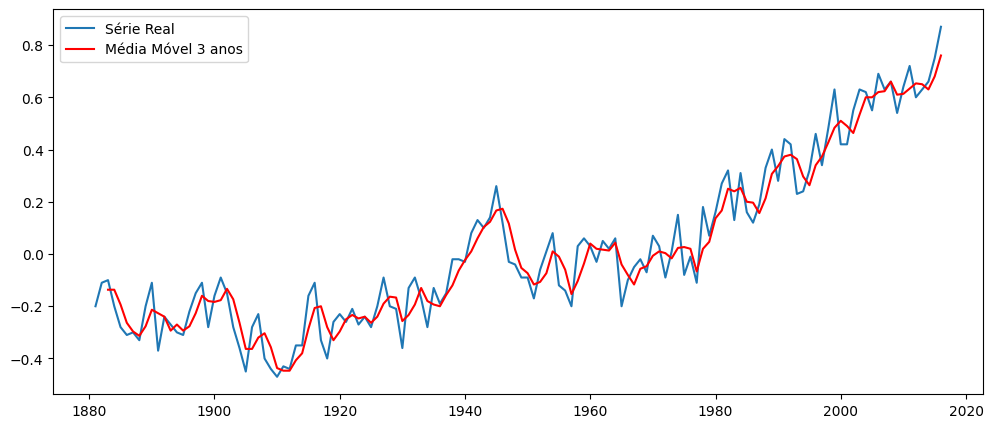

In [27]:
plt.plot(serie, label='Série Real')
plt.plot(media_movel1,color='red', label='Média Móvel 3 anos')
plt.legend(loc='best') # legenda ajusta o melhor local para plotar a legenda. 
plt.show()

a média móvel de 3 anos está dando uma suavizada na série, 


mostrando uma tendência


está coincidindo com os dados

na média móvel simples a gente perde o valor do início. 

# agora fazer a média móvel de 10 anos

In [28]:
media_movel2 = serie.rolling(window=10)
media_movel2 = media_movel2.mean()

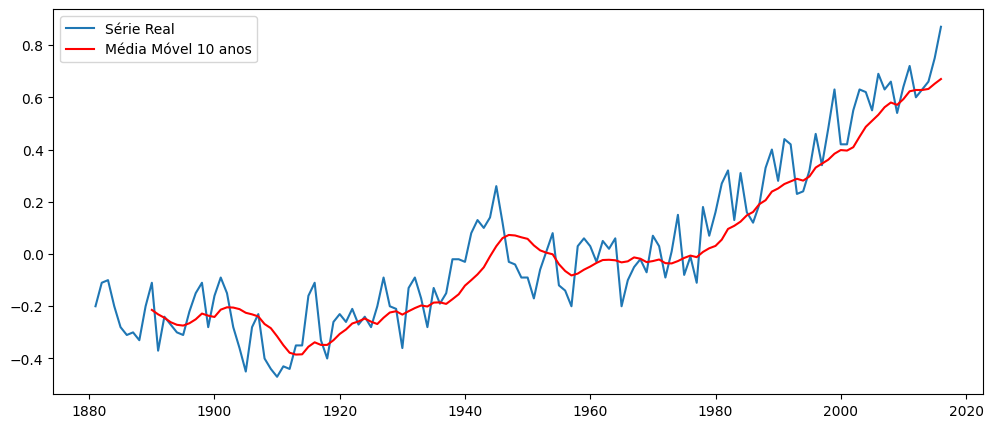

In [30]:
plt.plot(serie, label='Série Real')
plt.plot(media_movel2,color='red', label='Média Móvel 10 anos')
plt.legend(loc='best') # legenda ajusta o melhor local para plotar a legenda. 
plt.show()

### perda inicial de 10 anos, na média móvel há uma maior suavizada. A gente aumenta o período da média móvel, a série fica mais suavizada.

Fica claro mais a tendência. 

## A média móvel não é para fazer previsão, e sim para analisar uma tendência para onde a série está indo.  

para previsão, vamos montar o modelo da série temporal 

colocaremos agora uma janela de 20 anos, para calcular a média móvel

In [31]:
media_movel3 = serie.rolling(window=20)
media_movel3 = media_movel3.mean()

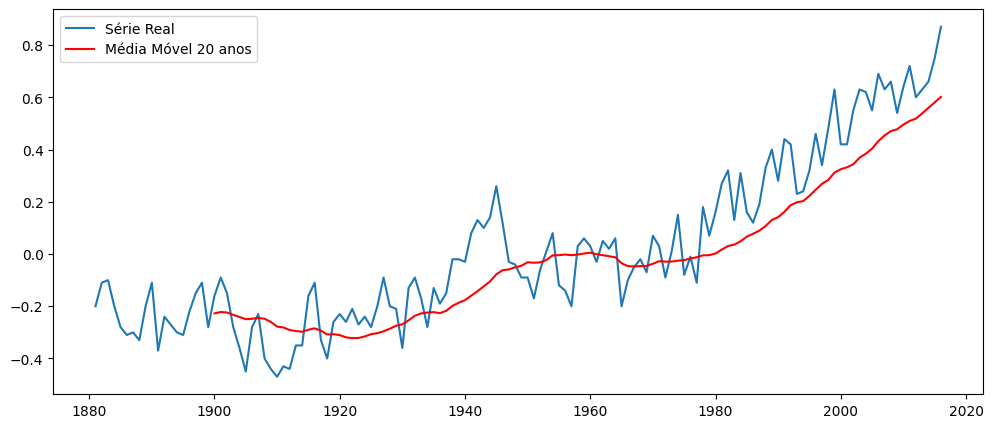

In [32]:
plt.plot(serie, label='Série Real')
plt.plot(media_movel3,color='red', label='Média Móvel 20 anos')
plt.legend(loc='best')
plt.show()

perdeu os dados iniciais e ficou ainda mais suavizada;


quase não tem oscilações, na média móvel com 20 anos de período, mas há mais noções da tendência. 

Temos que sempre analisar os nossos objetivos


COMPARAÇÃO COM TODAS AS MÉDIAS MÓVEIS FEITAS E MAIS O DADO REAL

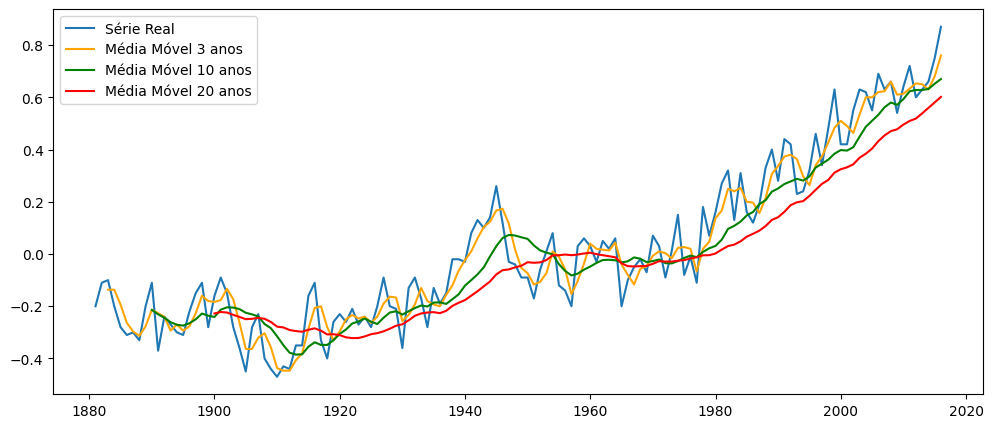

In [33]:
plt.plot(serie, label='Série Real')
plt.plot(media_movel1,color='orange', label='Média Móvel 3 anos');
plt.plot(media_movel2,color='green', label='Média Móvel 10 anos');
plt.plot(media_movel3,color='red', label='Média Móvel 20 anos');
plt.legend(loc='best')
plt.show()

a vermelha e a verde não tem grandes oscilações. 

a vermelha descartária, 

a verde e a amarela usariamos para as análises

# há outro tipo de média móvel, que é centralizada.

 Média móvel centralizada, window janela ou período da méia e center True - que é centralizado. 

média móvel 5 centralizada com janela de 10 anos, center = True 

média móvel 6 centralizada com janela de 20 anos, center = True 

In [35]:
media_movel4 = serie.rolling(window=3,center=True)
media_movel4 = media_movel4.mean()

In [36]:
media_movel5 = serie.rolling(window=10,center=True)
media_movel5 = media_movel5.mean()

In [37]:
media_movel6 = serie.rolling(window=20,center=True)
media_movel6 = media_movel6.mean()

São médias móveis simples, mas centralizadas 


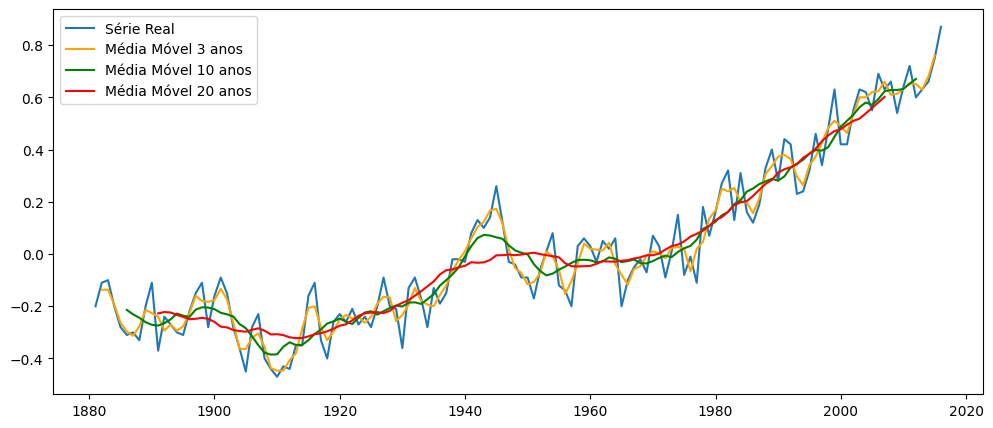

In [38]:
plt.plot(serie, label='Série Real')
plt.plot(media_movel4,color='orange', label='Média Móvel 3 anos');
plt.plot(media_movel5,color='green', label='Média Móvel 10 anos');
plt.plot(media_movel6,color='red', label='Média Móvel 20 anos');
plt.legend(loc='best')
plt.show()

## todos perdem os dados do período no início e no final, da média móvel, mas todas têm uma coerência com os dados reais, que ficam de forma compactados. 

## Comparados com a série real. 

 



aprendizado teórico quanto na prática. 

Tem que saber decompor, o que é estacionaridade, média móvel, tansformação, diferenciação



montagem de modelo de uma série temporal



tabela real, de média movel no próximo passo.